# Netflix EDA and Recommendation

### Importing Packages and Data

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

In [5]:
netflix_data= pd.read_csv('/Users/rupakpantha/Documents/DS_project/netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Cleaning Data

In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
netflix_data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [8]:
#changing type to a categorical value
netflix_data['type']= pd.Categorical(netflix_data['type'])

#netflix_data['type'].value_counts()
print(netflix_data['type'].cat.categories)

#changing date_added and release_year to date time
netflix_data['release_year'] = pd.to_datetime(netflix_data['release_year'], format='%Y')
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])


#netflix_data.info()
#netflix_data['release_year'].describe()

Index(['Movie', 'TV Show'], dtype='object')


In [9]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
netflix_data.dropna(subset=['date_added', 'rating', 'duration'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007-01-01,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018-01-01,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009-01-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006-01-01,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(1), datetime64[ns](2), object(9)
memory usage: 765.7+ KB


In [12]:
netflix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [13]:
netflix_data = netflix_data[~netflix_data['rating'].isin(['74 min', '84 min', '66 min'])]
netflix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
#Changing the rating 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}


In [15]:
netflix_data['target_ages'] = netflix_data['rating'].replace(ratings_ages)
netflix_data['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', nan], dtype=object)

In [16]:
netflix_data['target_ages'] = pd.Categorical(netflix_data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [17]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults


In [18]:
netflix_data.info()
netflix_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8804 non-null   object        
 1   type          8804 non-null   category      
 2   title         8804 non-null   object        
 3   director      6170 non-null   object        
 4   cast          7979 non-null   object        
 5   country       7973 non-null   object        
 6   date_added    8794 non-null   datetime64[ns]
 7   release_year  8804 non-null   datetime64[ns]
 8   rating        8800 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8804 non-null   object        
 11  description   8804 non-null   object        
 12  target_ages   8800 non-null   category      
dtypes: category(2), datetime64[ns](2), object(9)
memory usage: 842.9+ KB


/var/folders/cd/n45phffx5yg_r3722rk09k4w0000gn/T/ipykernel_98488/2319303138.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  netflix_data.describe()
/var/folders/cd/n45phffx5yg_r3722rk09k4w0000gn/T/ipykernel_98488/2319303138.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  netflix_data.describe()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
count,8804,8804,8804,6170,7979,7973,8794,8804,8800,8804,8804,8804,8800
unique,8804,2,8804,4527,7691,748,1714,74,14,220,514,8772,4
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,2020-01-01 00:00:00,2018-01-01 00:00:00,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",Adults
freq,1,6128,1,19,19,2815,110,1147,3207,1793,362,4,4092
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN


# EDA

In [19]:
shows= netflix_data[netflix_data['type']== 'TV Show']
movies= netflix_data[netflix_data['type']== 'Movie']

shows.head()
#movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Adults


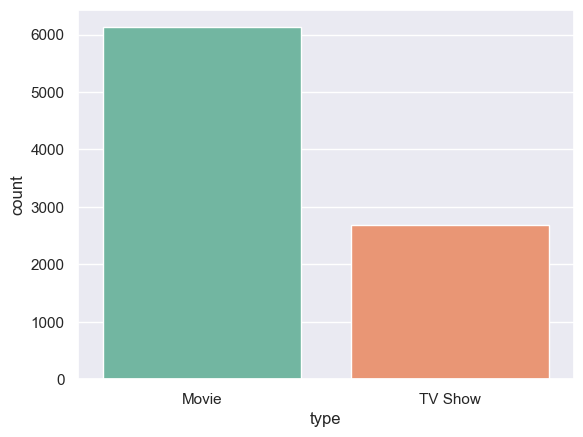

In [20]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_data, palette="Set2")

### Movies and TV shows Target Ages

In [21]:
def generate_rating_df(df):
    rating_df = df.groupby(['target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [22]:
movie_rating_df.head()

NameError: name 'movie_rating_df' is not defined

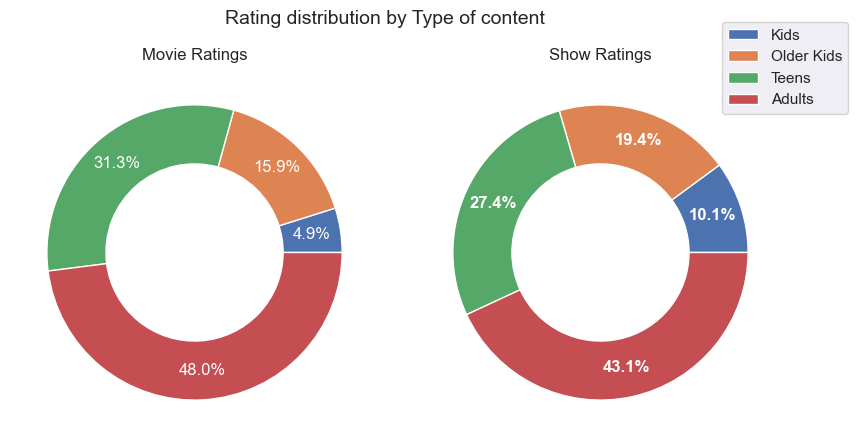

In [23]:

movie_rating_df = generate_rating_df(movies)
show_rating_df = generate_rating_df(shows)

# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# create the first pie chart
axs[0].pie(movie_rating_df['counts'], labels=movie_rating_df['target_ages'],
           textprops={'color': 'w'},
           autopct='%1.1f%%', pctdistance=0.8, wedgeprops=dict(width=0.4))
axs[0].set_title('Movie Ratings')

# create the second pie chart
axs[1].pie(show_rating_df['counts'], labels=show_rating_df['target_ages'],
           textprops={'color': 'w', 'fontweight': 'bold'},
           autopct='%1.1f%%', pctdistance=0.8, wedgeprops=dict(width=0.4))
axs[1].set_title('Show Ratings')

axs[1].legend(bbox_to_anchor=(1, 1), loc='center')

#add SubTitle
fig.suptitle("Rating distribution by Type of content", fontsize=14)
plt.subplots_adjust(wspace=0.1)
plt.show()

### Countries with most contents

In [24]:
# Lets retrieve just the first country
netflix_data['principal_country'] = netflix_data['country'].apply(lambda x: str(x).split(",")[0])

netflix_data['principal_country'].head()


0    United States
1     South Africa
2              nan
3              nan
4            India
Name: principal_country, dtype: object

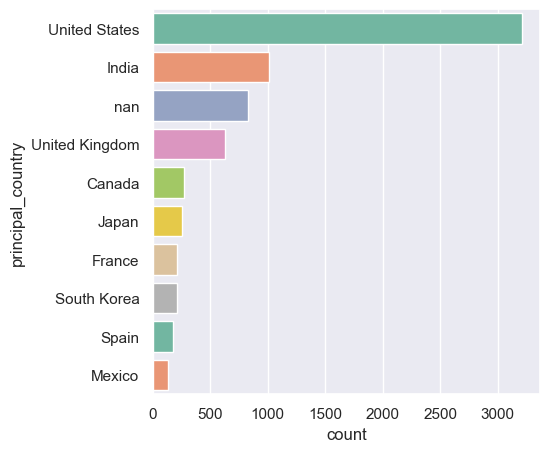

In [25]:
plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
ax = sns.countplot(y="principal_country", data=netflix_data, palette="Set2", 
                   order=netflix_data['principal_country'].value_counts().index[0:10])


### Analysis of Duration of Movies

In [26]:
movies['duration']=movies['duration'].str.replace(' min','')
movies['duration']=movies['duration'].astype(str).astype(int)
movies['duration']


/var/folders/cd/n45phffx5yg_r3722rk09k4w0000gn/T/ipykernel_98488/704299795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].str.replace(' min','')
/var/folders/cd/n45phffx5yg_r3722rk09k4w0000gn/T/ipykernel_98488/704299795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].astype(str).astype(int)


0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6128, dtype: int64

<AxesSubplot: xlabel='duration', ylabel='Density'>

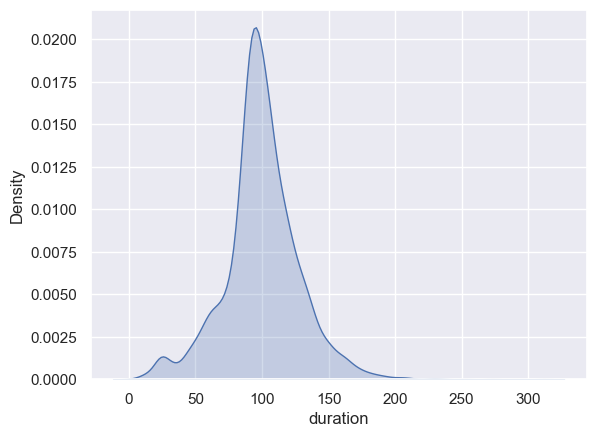

In [27]:
sns.set(style="darkgrid")
sns.kdeplot(data=movies['duration'], fill=True)

### Word Cloud of Genre

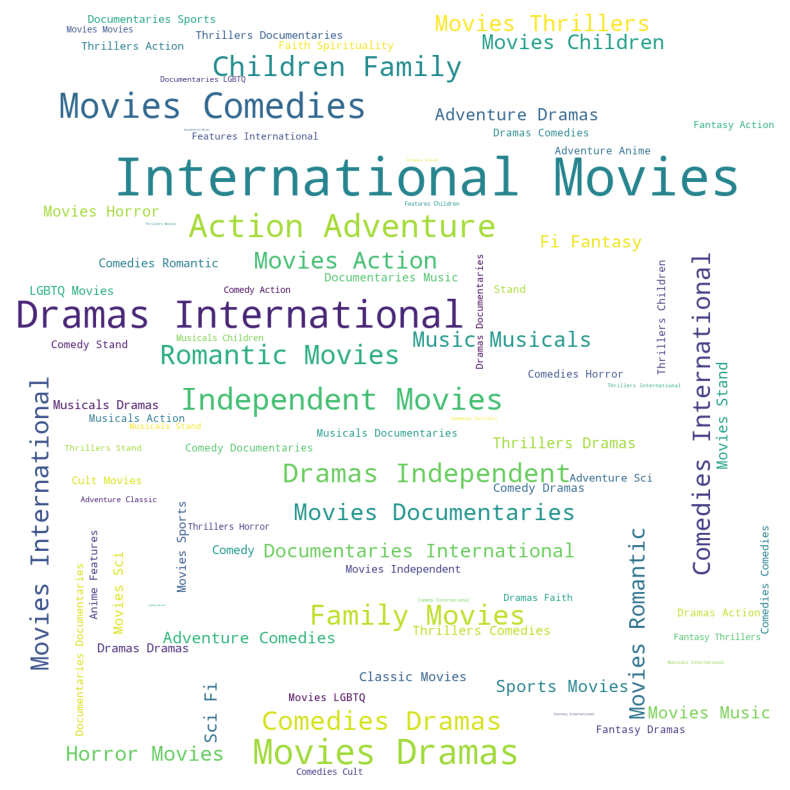

In [30]:

from wordcloud import WordCloud

text = str(list(movies['listed_in'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Recomendation Generator

### Using TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_data['description'] = netflix_data['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

#dir(v)
#print(tfidf.vocabulary_)


(8804, 18894)

In [ ]:
# #removing stopwords
# tfidf = TfidfVectorizer(stop_words='english')

# #Replace NaN with an empty string
# #netflix_data['description'] = netflix_data['description'].fillna('')

# #Construct the required TF-IDF matrix by fitting and transforming the data
# tfidf_matrix = tfidf.fit_transform(filledna['soup'])

# #Output the shape of tfidf_matrix
# tfidf_matrix.shape

In [33]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [34]:
indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()

In [35]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_data['title'].iloc[movie_indices]


In [57]:
get_recommendations('Peaky Blinders')

KeyError: 'Peaky Blinders'

### Using Count Vectorizer
Content Based Filtering On Multiple Metric

In [37]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8804 non-null   object        
 1   type               8804 non-null   category      
 2   title              8804 non-null   object        
 3   director           6170 non-null   object        
 4   cast               7979 non-null   object        
 5   country            7973 non-null   object        
 6   date_added         8794 non-null   datetime64[ns]
 7   release_year       8804 non-null   datetime64[ns]
 8   rating             8800 non-null   object        
 9   duration           8804 non-null   object        
 10  listed_in          8804 non-null   object        
 11  description        8804 non-null   object        
 12  target_ages        8800 non-null   category      
 13  principal_country  8804 non-null   object        
dtypes: categ

In [38]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [39]:
features=['title','director','cast','listed_in','description']
feature_data=netflix_data[features]
feature_data.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [40]:
filledna=feature_data.fillna('')
filledna.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [41]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."
3,jailbirdsneworleans,,,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein..."
4,kotafactory,,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...


In [42]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [43]:
filledna['soup'] = filledna.apply(create_soup, axis=1)
filledna['soup'].head()

0    dickjohnsonisdead kirstenjohnson  documentarie...
1    blood&water  amaqamata,khosingema,gailmabalane...
2    ganglands julienleclercq samibouajila,tracygot...
3    jailbirdsneworleans   docuseries,realitytv feu...
4    kotafactory  mayurmore,jitendrakumar,ranjanraj...
Name: soup, dtype: object

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)


In [45]:
cosine_sim2

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.04583492, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04583492, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.06933752,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06933752, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [46]:
print(count_matrix[1])

  (0, 789)	1
  (0, 2222)	1
  (0, 4731)	1
  (0, 8338)	1
  (0, 12284)	1
  (0, 16474)	1
  (0, 20153)	1
  (0, 20962)	1
  (0, 25508)	1
  (0, 26049)	1
  (0, 26877)	1
  (0, 30795)	1
  (0, 37050)	1
  (0, 43620)	1
  (0, 46448)	1
  (0, 46658)	1
  (0, 48013)	1
  (0, 49863)	1
  (0, 55153)	1
  (0, 55972)	1
  (0, 56926)	1
  (0, 57713)	1
  (0, 58489)	1
  (0, 64747)	1
  (0, 69955)	1
  (0, 69959)	1
  (0, 72188)	1
  (0, 74753)	1


In [47]:
print(cosine_sim2)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.04583492 ... 0.         0.         0.        ]
 [0.         0.04583492 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.06933752 0.        ]
 [0.         0.         0.         ... 0.06933752 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [54]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])
indices.head(20)

title
dickjohnsonisdead                                0
blood&water                                      1
ganglands                                        2
jailbirdsneworleans                              3
kotafactory                                      4
midnightmass                                     5
mylittlepony:anewgeneration                      6
sankofa                                          7
thegreatbritishbakingshow                        8
thestarling                                      9
vendetta:truth,liesandthemafia                  10
bangkokbreaking                                 11
jesuiskarl                                      12
confessionsofaninvisiblegirl                    13
crimestories:indiadetectives                    14
dearwhitepeople                                 15
europe'smostdangerousman:ottoskorzenyinspain    16
falsaidentidad                                  17
intrusion                                       18
jaguar                   

In [49]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_data['title'].iloc[movie_indices]


In [63]:
get_recommendations_new('', cosine_sim2)

KeyError: 'absolutepower'